/var/folders/nk/t7l1hjxs5wnc71zd0vhbf5mm0000gn/T/ipykernel_62579/2169795137.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_columns = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).apply(lambda x: pd.to_datetime(x, errors='coerce').notna().any())].tolist()
/var/folders/nk/t7l1hjxs5wnc71zd0vhbf5mm0000gn/T/ipykernel_62579/2169795137.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_columns = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).apply(lambda x: pd.to_datetime(x, errors='coerce').notna().any())].tolist()
/var/folders/nk/t7l1hjxs5wnc71zd0vhbf5mm0000gn/T/ipykernel_62579/2169795137.py:28: UserWarning: Could not infer form

Mean Squared Error: 0.0946
R^2 Score: 0.9544


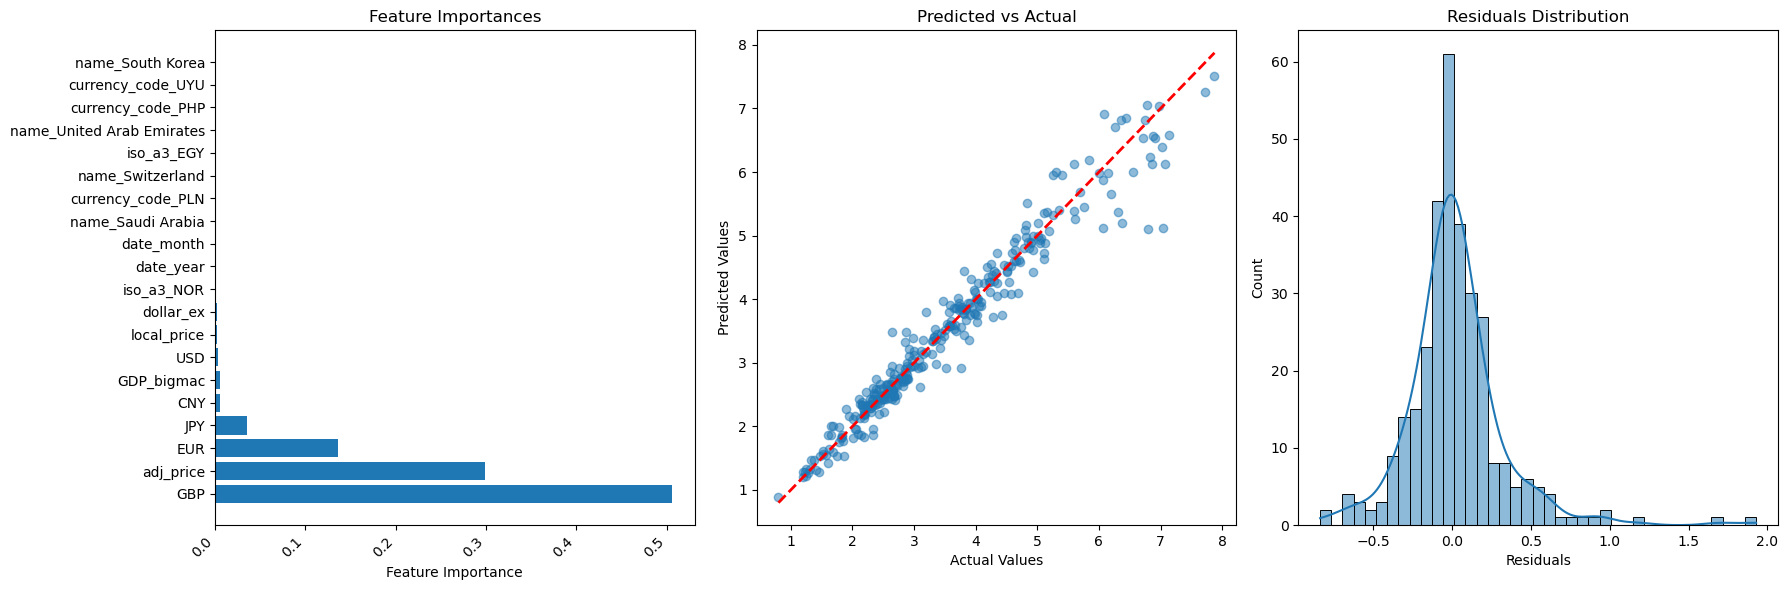

Model saved to ~/trained_model.joblib


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


def preprocess_dates(df, date_columns):
    for date_col in date_columns:
        if date_col in df.columns:
            df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
            df[f'{date_col}_year'] = df[date_col].dt.year
            df[f'{date_col}_month'] = df[date_col].dt.month
            df[f'{date_col}_day'] = df[date_col].dt.day
            df = df.drop(columns=[date_col])
    return df

def load_data(file_path, target_column, skip_rows=0):
    df = pd.read_csv(file_path, skiprows=skip_rows)
    df.columns = df.columns.str.strip()

    if target_column not in df.columns:
        raise KeyError(f"Target column '{target_column}' not found in DataFrame. Available columns: {df.columns.tolist()}")
    
    df = df.dropna(subset=[target_column])

    date_columns = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).apply(lambda x: pd.to_datetime(x, errors='coerce').notna().any())].tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

    if date_columns:
        df = preprocess_dates(df, date_columns)

    X = df.drop(columns=[target_column])
    y = df[target_column]

    categorical_cols = [col for col in categorical_cols if col in X.columns]

    if categorical_cols:
        X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)




    return X, y

def initialize_train_evaluate_model(file_path, target_column, skip_rows=0, test_size=0.2):
    X, y = load_data(file_path, target_column, skip_rows)
    
    model = DecisionTreeRegressor(random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")

    plt.figure(figsize=(18, 6))

    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        sorted_idx = feature_importances.argsort()
        top_n = 20
        sorted_idx = sorted_idx[-top_n:]
        plt.subplot(1, 3, 1)
        plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
        plt.xlabel('Feature Importance')
        plt.title('Feature Importances')
        plt.gca().invert_yaxis()
        plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 3, 2)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs Actual')

    residuals = y_test - y_pred
    plt.subplot(1, 3, 3)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title('Residuals Distribution')

    plt.tight_layout()
    plt.show()

    model_filename = '~/trained_model.joblib'
 
    print(f"Model saved to {model_filename}")

    

file_path = "/Users/drewmiddleton/Desktop/big-mac-adjusted-index (1).csv"
target_column = "dollar_price"
initialize_train_evaluate_model(file_path, target_column)



In [16]:
test_df = pd.read_csv("/Users/drewmiddleton/Desktop/big-mac-adjusted-index (1).csv")

In [17]:
print(test_df.columns)

Index(['date', 'iso_a3', 'currency_code', 'name', 'local_price', 'dollar_ex',
       'dollar_price', 'GDP_bigmac', 'adj_price', 'USD', 'EUR', 'GBP', 'JPY',
       'CNY'],
      dtype='object')


In [20]:
test_df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
0,2000-04-01,ARG,ARS,Argentina,2.50,1.000000,2.500000,7803.328512,1.927633,0.39805,0.16574,-0.06353,0.10595,0.96855
1,2000-04-01,AUS,AUD,Australia,2.59,1.680000,1.541667,29189.447784,2.317830,-0.28301,-0.40215,-0.51973,-0.43281,0.00958
2,2000-04-01,BRA,BRL,Brazil,2.95,1.790000,1.648045,4913.910780,1.874915,-0.05247,-0.20992,-0.36530,-0.25044,0.33419
3,2000-04-01,GBR,GBP,Britain,1.90,0.632911,3.002000,20958.600084,2.167656,0.49289,0.24482,0.00000,0.18097,1.10209
4,2000-04-01,CAN,CAD,Canada,2.85,1.470000,1.938776,26087.329235,2.261231,-0.07575,-0.22933,-0.38090,-0.26886,0.30141
